### Author: Muhammad Bilal Khan

### Goal

In this notebook, I intend to utilize the UCI Heart Disease Dataset [link uci-heart-disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data) to develop and train a machine learning model. The goal is to accurately predict the presence of heart disease in individuals by analyzing a range of health-related factors. Through this process, I'll apply various data preprocessing and machine learning techniques to create a model that can serve as a valuable tool in identifying potential heart disease risks based on clinical parameters.

I will employ the following machine learning models:

  - Simple Imputer model
  - Random Forest model

I will be using the following measurement metrics to determine whether the model is appropriate for the patient:

  - Accuracy score
  - Precision score
  - Recall score
  - F1 score

### Dataset 
The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.  The dataset is  collected from 

  #### Dataset Overview

- **Number of Instances:** (total number of patients are 920)
- **Number of Attributes:** (total number of features excluding the target variable are 15)
- **Target Variable:** `num` (indicates the presence of heart disease in the patient)
  - The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

  - 0: No presence of heart disease.
  - 1: Mild or some presence of heart disease.
  - 2: Moderate presence of heart disease.
  - 3: Severe presence of heart disease.
  - 4: Very severe presence of heart disease.

  #### Column Descriptions

Below is a description of each feature included in the dataset:

- `id`: Unique identifier for each patient.
- `age`: Age of the patient in years.
- `origin`: Place of study where the data was collected.
- `sex`: Gender of the patient. Values are Male or Female.
- `cp`: Chest pain type. Categories include:
  - `typical angina`
  - `atypical angina`
  - `non-anginal`
  - `asymptomatic`
- `trestbps`: Resting blood pressure in mm Hg on admission to the hospital.
- `chol`: Serum cholesterol in mg/dl.
- `fbs`: Indicates if fasting blood sugar is greater than 120 mg/dl (True or False).
- `restecg`: Resting electrocardiographic results. Categories include:
  - `normal`
  - `stt abnormality`
  - `lv hypertrophy`
- `thalach`: Maximum heart rate achieved.
- `exang`: Exercise-induced angina (True or False).
- `oldpeak`: ST depression induced by exercise relative to rest.
- `slope`: The slope of the peak exercise ST segment.
- `ca`: Number of major vessels (0-3) colored by fluoroscopy.
- `thal`: Thalassemia category. Categories include:
  - `normal`
  - `fixed defect`
  - `reversible defect`
- `num`: The predicted attribute, diagnosis of heart disease (angiographic disease status).
  - The num variable in the UCI Heart Disease dataset is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:

    - 0: No presence of heart disease.
    - 1: Mild or some presence of heart disease.
    - 2: Moderate presence of heart disease.
    - 3: Severe presence of heart disease.
    - 4: Very severe presence of heart disease.

### Acknowledgements

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


In [1013]:
# Importing necessary libraries for data manipulation, analysis, and visualization: pandas, numpy, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')



### Load Dataset

In [1014]:
# read data
df = pd.read_csv('data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Inspect dataset

In [1015]:
# Check the shape of the data
df.shape

print('-' * 50)
print('Observations from dataset inspection:')
print('-' * 50)

print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

--------------------------------------------------
Observations from dataset inspection:
--------------------------------------------------
There are 920 patients and 16 features in the dataset.


In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


This function `print_heading` is used to print a provided heading text surrounded by lines. It takes one argument, `heading`, which is the text to be printed as the heading. The function prints 50 hyphen characters, then the heading text, and then another 50 hyphen characters to create a clear and distinct section in the output.

In [1017]:
# print heading
def print_heading(heading):
    print('-' * 50)
    print(heading)
    print('-' * 50)

In [1018]:
print_heading("DATASET INFORMATION SUMMARY")

print("1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.")
print("2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.")
print("3. Significant missing data is found in 'ca' with 66.41% missing.")
print("4. Significant missing data is found in 'thal' with 52.83% missing.")
print("5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.")
print("6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.")

--------------------------------------------------
DATASET INFORMATION SUMMARY
--------------------------------------------------
1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.
2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.
3. Significant missing data is found in 'ca' with 66.41% missing.
4. Significant missing data is found in 'thal' with 52.83% missing.
5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.
6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.


### Summary statistics

In [1019]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### Observations from the summary statistics

In [1020]:

print_heading('Observations from summary statistics'.upper())

print(f"1. There are no heart diseases found in the 25% of the patients with an average of age {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average of age {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age {df.describe().loc['75%', 'age']} or more.")

--------------------------------------------------
OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.


### Missing values

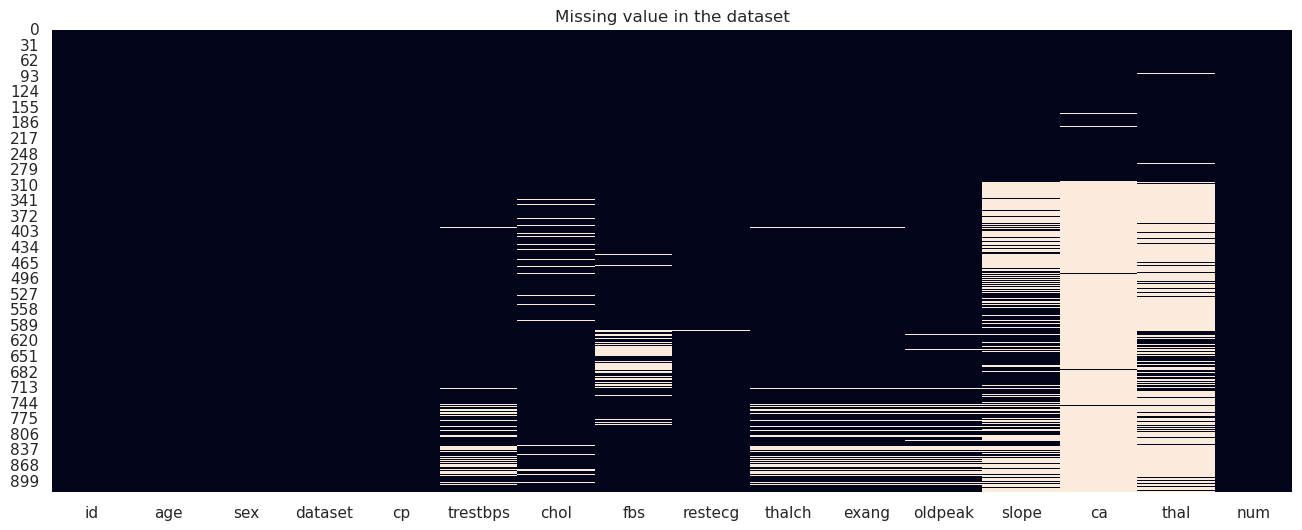

In [1021]:
# Plot the heatmap on dataset to check the missing values 
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

In [1022]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

In [1023]:

print_heading('Observations from missing values'.upper())

print("1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.\n"
      "2. 'Slope' also has a substantial 33.59% of values missing.\n"
      "3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.\n"
      "4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.")

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES
--------------------------------------------------
1. The dataset shows significant gaps in key features, with 'ca' and 'thal' being the most affected, missing 66.41% and 52.83% of their data, respectively.
2. 'Slope' also has a substantial 33.59% of values missing.
3. These high levels of incompleteness are likely to pose challenges for any predictive analysis.
4. Advanced imputation techniques may be necessary to address the deficiencies before any reliable model training can be conducted.


#### Applying the SimpleImputer method to handle smaller percentages of missing values

In [1024]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = [
    col 
    for col in df.columns 
    if (
        (df[col].dtype in ['int64', 'float64']) and 
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold and 
        col != target_variable
    )
]

# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col
                   for col in df.columns 
                   if (
                        df[col].dtype == 'object') and 
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]

# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical and categorical columns
for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print_heading('Observations from missing values after imputation'.upper())

# Confirm there are no missing values left

missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")
print_heading('High missing values features'.upper())

# Display the features with missing values 
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")
    

--------------------------------------------------
OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
--------------------------------------------------
The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

--------------------------------------------------
HIGH MISSING VALUES FEATURES
--------------------------------------------------
The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


#### Heatmap for missing values

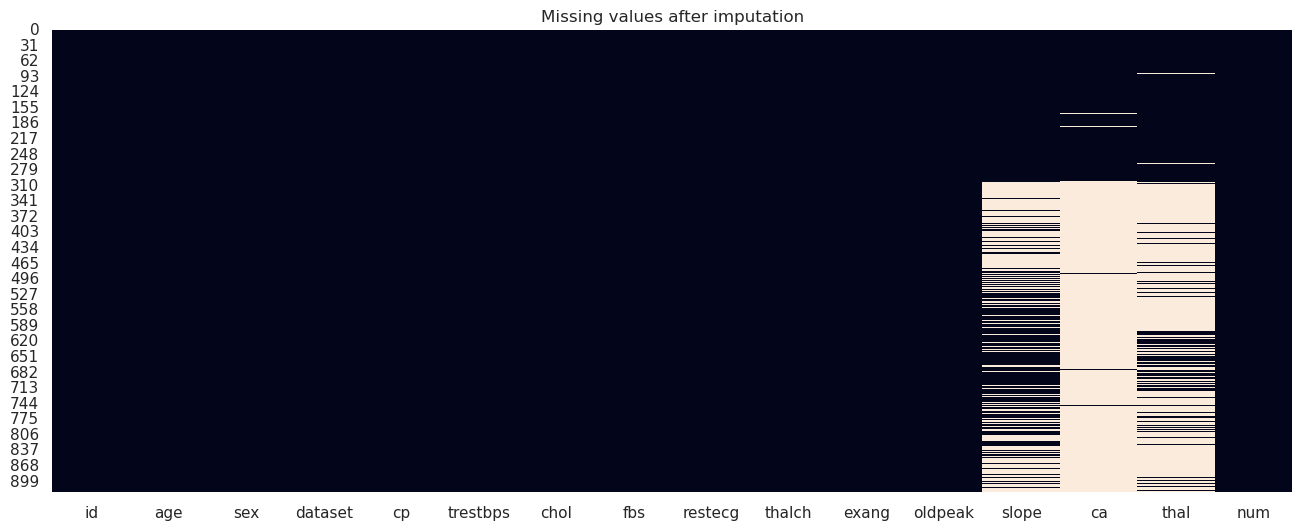

In [1025]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

#### Observation
Currently, only three variables remain with a substantial proportion of missing values. To address this, I will employ the Random Forest algorithm to estimate the missing data. By training a model specifically for this purpose, I aim to predict the missing entries that exhibit high rates of absence. Once predictions are made, I will integrate these estimations back into the DataFrame to complete the imputation process.
#### Strategy
I plan to tackle the imputation of missing values in features that have a significant amount of data missing by leveraging the Random Forest algorithm. My strategy is to divide the dataset into two subsets: the first will consist of records without missing values, and the second will contain the instances with missing values in the pertinent features. I will utilize the first subset to train the Random Forest model. Once the model is adequately trained, I will apply it to the second subset, which has the missing values, to predict those values. Finally, I will merge these predictions back into the original dataset, thereby replacing the missing entries with the imputed values.

Here are the steps:

1. Separate the Data: Split your dataset into two subsets:

    - Subset A: Rows without any missing values in the high-missing-rate features.
    - Subset B: Rows with missing values in those particular features.
2. Train the Model: Use Subset A to train the Random Forest model. The features with complete data will be used as predictors, while the feature you're imputing will be the target variable.

3. Predict Missing Values: Apply the trained Random Forest model to Subset B to predict the missing values. Only use the rows with missing values for the prediction to fill in the gaps.

4. Impute the Data: Take the predictions for the missing values and use them to impute the missing data in Subset B. This step merges the predicted values back into the original dataset.

5. Recombine the Data: Concatenate Subset A and the now imputed Subset B to reconstruct the complete dataset with all the previously missing values imputed.



In [1026]:
# split the dataset into two subset with one contaning complete data and the other containing missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# create a new dataframe which contains all the rows that have nan values
df_missing = df[df.isna().any(axis=1)]

print_heading('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print_heading('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

--------------------------------------------------
COMPLETE DATA WITH NO MISSING VALUES
--------------------------------------------------
The shape of the complete dataframe is: (299, 16)


--------------------------------------------------
MISSING DATA WITH HIGH MISSING VALUES
--------------------------------------------------
The shape of the dataframe with missing values is: (621, 16)


#### Next step - Applying Random Forest Algorithm to train the model

In [1027]:
# Training and evaluating the model for the target variables 'slope', 'thanl', and 'ca'.
def predict_and_evaluate(target_variables, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)
    
    # Select target variable(s)
    y = df_clean[target_variables]

    # Initialize LabelEncoder
    le = LabelEncoder()
    #le = OneHotEncoder()
    
    for col in X.columns:
        # If column is of object type
        if X[col].dtype == 'object':
            # Encode the column
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print heading
    print_heading(f'Model performance for {target_variables}'.upper())
    
    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model


In [1028]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])



--------------------------------------------------
MODEL PERFORMANCE FOR SLOPE
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [1029]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR CA
--------------------------------------------------
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [1030]:
# # Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

--------------------------------------------------
MODEL PERFORMANCE FOR THAL
--------------------------------------------------
The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



#### Next step - Predicting Missing Values with a Trained Model

In our data processing pipeline, we face a dataset, `df_missing`, with a significant number of missing values in the `slope`, `ca`, and `thal` columns. To address this, we undertake the following steps:

1. **Data Preparation**:
   We create a new DataFrame `df_encoded_pred` by dropping the columns with missing values (`slope`, `ca`, and `thal`) from `df_missing`. This step is crucial for preparing the data for prediction by removing the target variables that we aim to predict.

2. **Encoding and Prediction Function**:
We define a function `encode_and_predict` to automate the encoding of categorical features and to use a trained model for predicting the missing values:

   - The function initializes a LabelEncoder for transforming categorical text data into a numerical format suitable for the model.
   - It iterates over each column in the provided DataFrame, applying the label encoder to columns of type object (categorical).
     Finally, it uses the input model to predict values for the specified target variable.

3. **Applying the Trained Model**:
We call the encode_and_predict function, passing in the df_encoded_pred DataFrame, the name of the target variable slope, and the pre-trained model rf_models. These trained model is specifically applied to predict the high number of missing values in the `'slope', 'thal', and 'ca'` column.

4. **Updating the Original Data**:
After predicting the slope values, we update the corresponding column in the original `df_missing` DataFrame with the newly predicted values. This allows us to fill in the gaps in our original dataset.


#### Predicting missing values for the slope of the peak exercise ST segment.

In [1031]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

# Encode categorical features and predict the missing values
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)

# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']


#### Predicting missing values for ca - Number of major vessels (0-3) colored by fluoroscopy.



In [1032]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']



  #### Predicting missing values for thal - Thalassemia category. 


In [1033]:
# Create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']


#### Next step - Merging the datasets

In [1034]:
# merge df_clean and df_missing 
df = pd.concat([df_clean, df_missing])

print_heading('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

--------------------------------------------------
DATASET SHAPE INSPECT
--------------------------------------------------
The shape of the dataset is: 920 rows and 16 columns.


#### Verification of the trained model

In [1035]:
# Display the missing values if any in the dataset for verification
print_heading('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

--------------------------------------------------
MISSING VALUES INSPECT
--------------------------------------------------
There are no missing values in the dataset.


#### Heatmap for verifying that the dataset is clean.

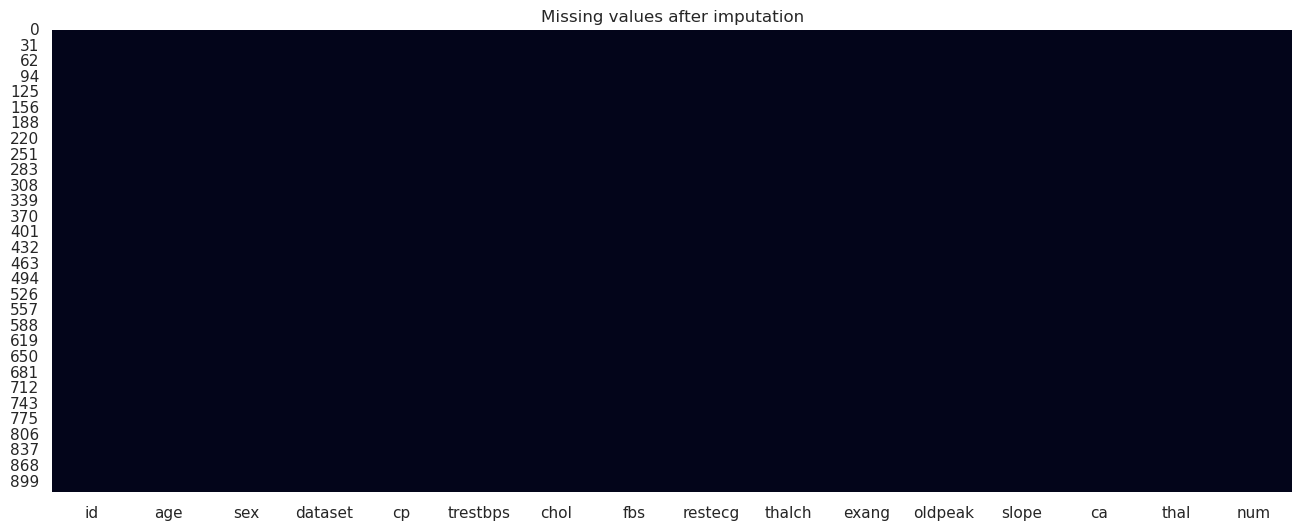

In [1036]:
# create a heatmap for df to check missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

#### Observations about the dataset:
- The dataset is fully complete with no missing values in any of the columns.
- All 16 columns, including 'id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', and 'num', have 0 missing values.
- This completeness is an ideal scenario for conducting reliable statistical analyses or for input into machine learning models.
- Having no missing values suggests that the data collection process was thorough and that the dataset has been well-prepared for further processing.
- With a complete dataset, we can proceed with confidence in exploring the data, visualizing patterns, and drawing insights.

#### Next step - Visualizing data distribution with Histogram and Boxplot
To better understand the characteristics of our numerical features, I will create histograms and box plots for each of them. This visualization technique serves two primary purposes: first, it allows us to examine the data distribution, and second, it helps us identify potential outliers. Detecting outliers is crucial as they can significantly impact the performance of predictive models. Additionally, by observing the spread of the data, I can determine whether any scaling or transformation is necessary before training a model on the target variable 'num'. By ensuring our data is well-distributed and free of extreme values, I can improve the model's ability to learn and make accurate predictions.

In [1037]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#00FFFF"]):
    # Set to "dark" for a black background
    sns.set(style="dark", palette="deep")

    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color=cyan_palette[0])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#000133')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='w', marker='o', markeredgecolor='w', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#000133')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()


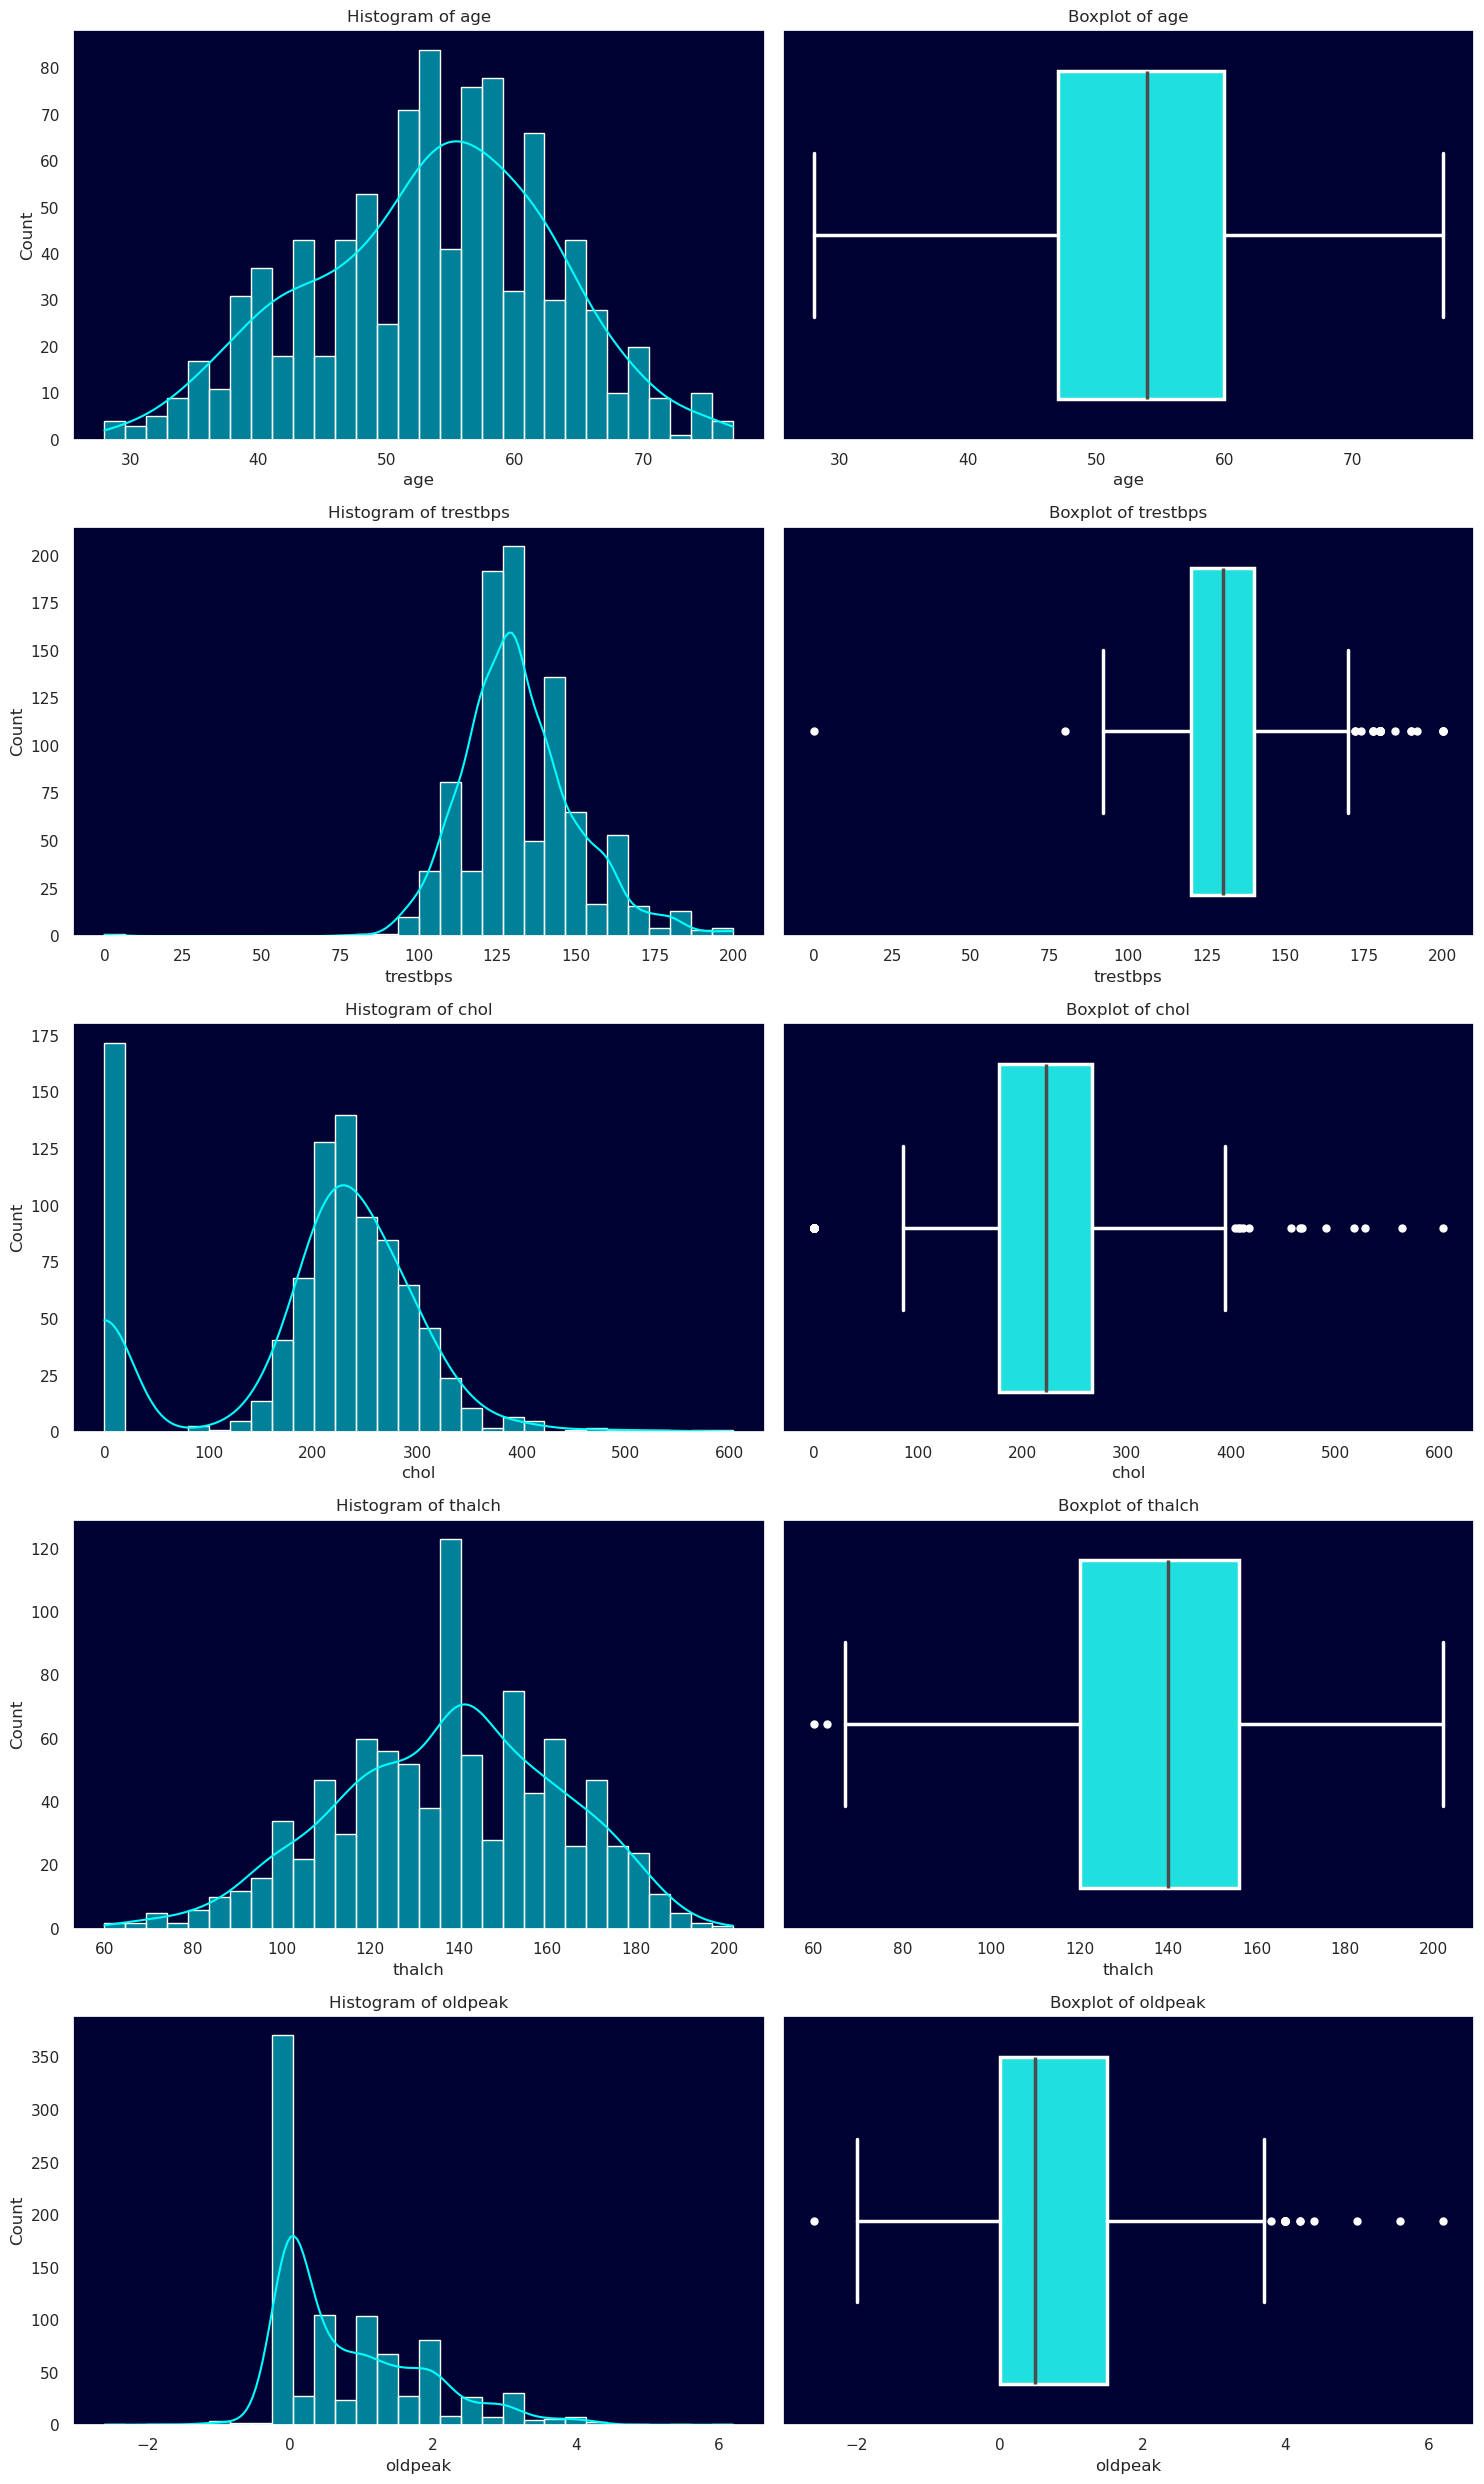

In [1038]:
# Remove id column from numerical_cols
numerical_cols.remove('id')
# Plot histogram and boxplot for numerical columns before scaling
plot_histogram_and_boxplot(df, numerical_cols)

#### Next step - Normalizing Numerical Features with Quantile Transform
To prepare the dataset for effective model training, I am employing a QuantileTransformer to normalize the numerical features. This transformation technique is designed to map the original data distribution to a normal distribution, which is particularly beneficial for algorithms that assume input data is normally distributed. The transformation is applied to each numerical column in the DataFrame, aiming to stabilize variance and minimize the influence of outliers. 

In [1039]:
# Instantiate the QuantileTransformer with a normal output distribution and a fixed random state for reproducibility
quantile_transformer = QuantileTransformer(random_state=42, output_distribution='normal')

# Apply the transformer to the numerical columns of the DataFrame
df[numerical_cols] = quantile_transformer.fit_transform(df[numerical_cols])


### Next step - Outlier Removal Using Interquartile Range

Outliers can significantly skew the results of a dataset, particularly in statistical analyses that assume a normal distribution of data. To address this, I've defined a function to detect and remove outliers within each numerical column of the DataFrame based on the Interquartile Range (IQR) method.

The function calculates the first (Q1) and third (Q3) quartiles, and the IQR (the difference between Q3 and Q1). It then determines the lower and upper bounds for acceptable data points. Values lying outside 1.5 times the IQR below Q1 or above Q3 are considered outliers and are removed from the dataset.

This cleaning process has been applied to each numerical column, with the exception of 'oldpeak' and 'chol', which have been omitted from this outlier removal step. By refining the dataset in this manner, we can potentially improve model accuracy, as the remaining data will be more representative of the underlying trend without the distortion from extreme values.

In [1040]:
# Define a function to detect and remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_detected = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    #calculate the percentage of outliers in the dataset
   
    print(f"Number of outliers detected in {column}: {round(len(outliers_detected)/df[column].shape[0] * 100, 2)}%")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print_heading(f"percentages of outliers detected".upper())
# Apply the function to each numerical column
# remove oldpeak and chol column from the numerical columns
for column in numerical_cols:
    df = remove_outliers(df, column)

--------------------------------------------------
PERCENTAGES OF OUTLIERS DETECTED
--------------------------------------------------
Number of outliers detected in age: 0.87%
Number of outliers detected in trestbps: 1.32%
Number of outliers detected in chol: 19.11%
Number of outliers detected in thalch: 0.41%
Number of outliers detected in oldpeak: 0.28%


#### Observation from the outliers detection
1. `Age`: The outlier percentage is very low at `0.87%`, indicating that age values are generally consistent with a typical distribution.
2. `Trestbps`: A slightly higher outlier percentage of `1.32%` suggests minor deviations from the norm in resting blood pressure measurements.
3. `Chol`: The notably high outlier percentage of `19.11%` in serum cholesterol levels indicates a substantial variation that could affect the dataset's overall analysis and model performance.
4. `Thalach`: With an outlier percentage of `0.41%`, the maximum heart rate achieved by individuals is mostly within expected ranges.
5. `Oldpeak`: The extremely low outlier percentage of `0.28%` for ST depression indicates a very uniform distribution with minimal extreme deviations.

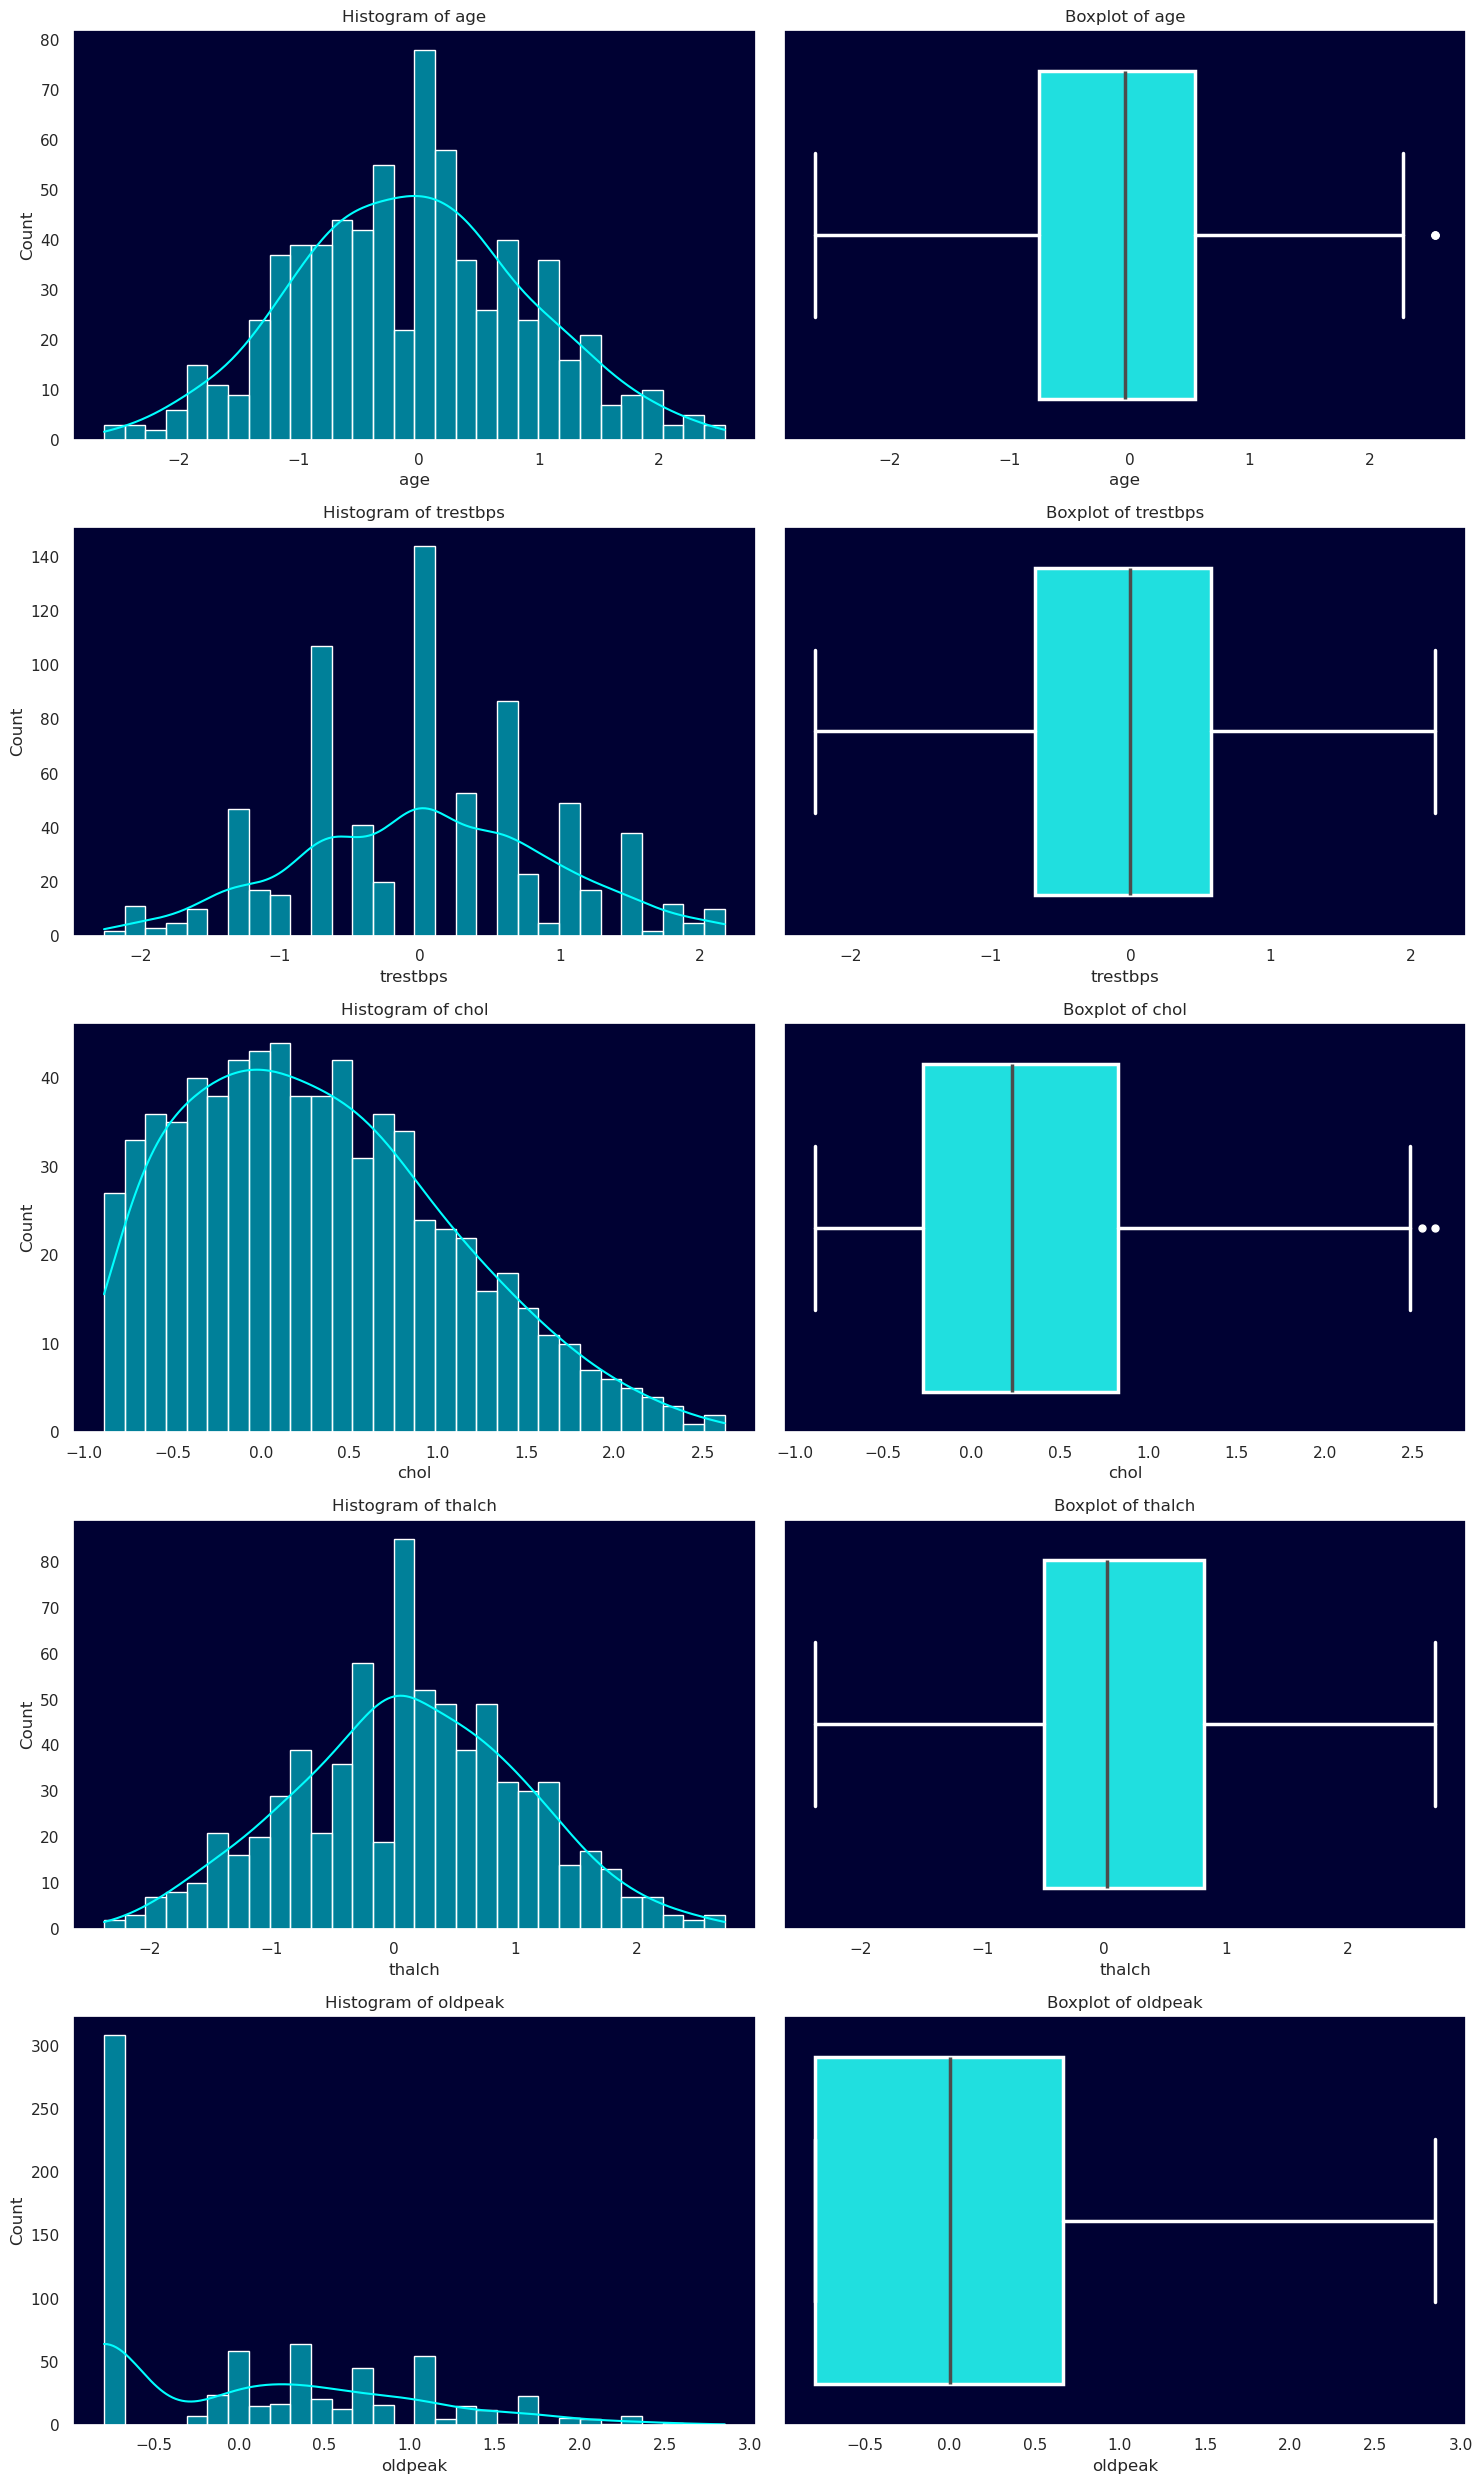

In [1041]:
# Plot histogram and boxplot for numerical columns after removing outliers
plot_histogram_and_boxplot(df, numerical_cols)

#### Next step - Training and Evaluating a RandomForest Classifier on Heart Disease Data
In the next step, we are preparing a dataset for machine learning by first separating the features (X) from the target variable (y), which is `'num'`. The features dataset is created by dropping the `'num'` column from the DataFrame. We then encode categorical variables in the features to numerical values using LabelEncoder.

With the data prepared, we split it into training and testing sets, ensuring that we can both train and validate our model's performance. A `RandomForestClassifier model` is initialized and then trained using the `training set (X_train, y_train)`.

After training, we use the model to make predictions on the `test set (X_test)`. The predictions are then evaluated against the actual target values in `y_test` using a confusion matrix and classification metrics, providing us with a quantitative assessment of the model's accuracy and performance. Thus, we are both training and predicting the outcome for the target variable `'num'` using a `RandomForestClassifier`.

In [1042]:

# Drop the target column 'num' from the DataFrame to create the features dataset
X = df.drop('num', axis=1)

# Create the target dataset
y = df['num']

# Initialize LabelEncoder
le = LabelEncoder()
for col in X.columns:
    # If column is of object type
    if X[col].dtype == 'object':
        # Encode the column to convert categorical variables into numerical
        X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the testing data
y_pred = rf_model.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix, accuracy of the model and the classification report
print_heading('Model performance'.upper())
print(f"The confusion matrix is:\n {confusion_matrix(y_test, y_pred)}")
print(f"\nThe accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")
print(f"Classification report:\n {classification_report(y_test, y_pred)}")

--------------------------------------------------
MODEL PERFORMANCE
--------------------------------------------------
The confusion matrix is:
 [[69  7  0  1  0]
 [ 7 25  5  3  0]
 [ 2  4  3  2  0]
 [ 3  5  2  4  1]
 [ 0  0  2  0  0]]

The accuracy of the model is: 0.7
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.61      0.62      0.62        40
           2       0.25      0.27      0.26        11
           3       0.40      0.27      0.32        15
           4       0.00      0.00      0.00         2

    accuracy                           0.70       145
   macro avg       0.42      0.41      0.41       145
weighted avg       0.68      0.70      0.69       145



#### Confusion matrix on trained model

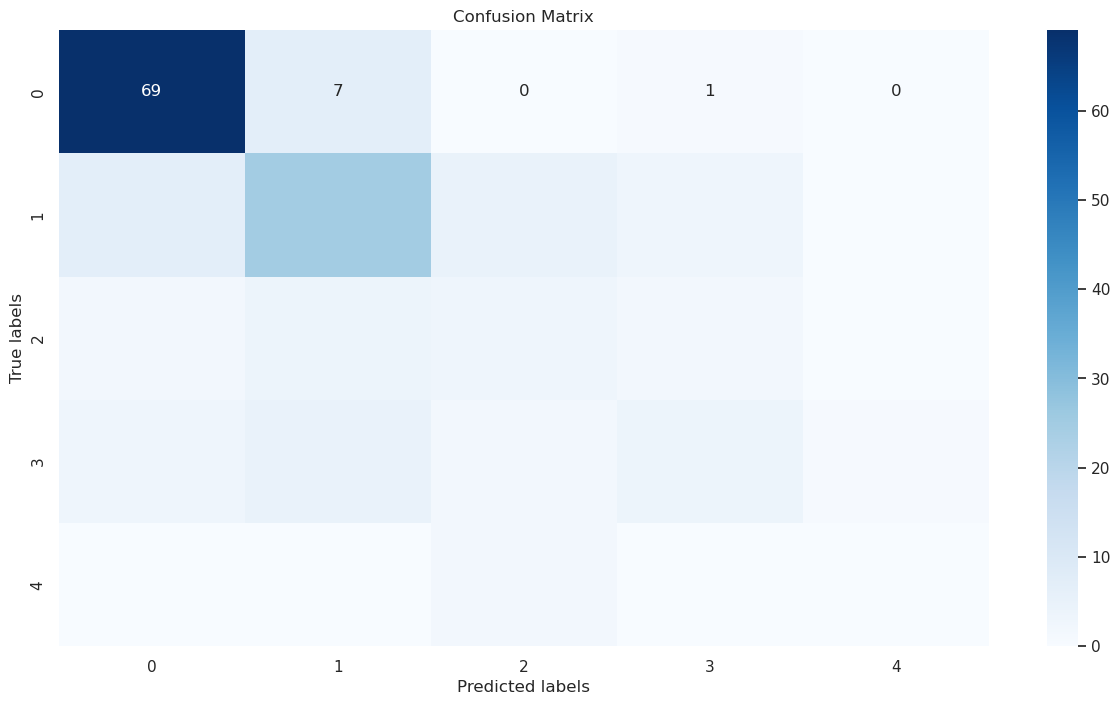

In [1043]:
# Create a heatmap from the confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Adding labels to the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels') 
plt.show()

#### Observations - Evaluation of Model Performance
1. **Overall Accuracy**: The model achieves an accuracy of 70%, indicating that it correctly predicts the target variable 'num' 70% of the time on the test dataset.

2. **Class 0 Performance**: High precision (85%) and recall (90%) for class 0 suggest the model is quite effective in predicting this class.

3. **Class 1 Performance**: Moderate precision (61%) and recall (62%) for class 1 indicate reasonable performance, though there is room for improvement.

4. **Class 2 to 4 Performance**: Lower precision and recall for classes 2, 3, and 4 (with particularly low precision for class 2 and no correct predictions for class 4) reveal the model struggles with less represented classes.

4. **F1-Score**: The F1-scores across the classes vary, with high scores for class 0 but significantly lower scores for other classes, reflecting the imbalanced performance across different classes.

5. **Confusion Matrix**: The confusion matrix shows a higher number of misclassifications between classes 1, 2, and 3, indicating potential confusion within the model when predicting these classes.

6. **Macro and Weighted Averages**: The macro average is low (0.41) due to poor performance on minority classes, while the weighted average is slightly better (0.69) since it accounts for the class imbalance by weighting the metrics according to the number of samples in each class.

#### Conclusion on Model Performance
The RandomForestClassifier model demonstrated a decent overall accuracy for predicting the target variable `'num'`. However, its performance varied significantly across different classes, excelling in identifying the majority class but struggling with minority classes. These discrepancies highlight the need to improve class balance handling, possibly through other techniques in the model training process. Additionally, fine-tuning model parameters or exploring more sophisticated algorithms could enhance predictive capabilities, especially for underperforming classes.